In [1]:
import pandas as pd

df = pd.read_excel("./DATA/student_depression_dataset.xlsx")

df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


In [2]:
import pandas as pd

academic_pressure = df["Academic Pressure"]
cgpa = df["CGPA"]

summary = {
    "Mean": [academic_pressure.mean(), cgpa.mean()],
    "Median": [academic_pressure.median(), cgpa.median()],
    "Modus": [academic_pressure.mode().iloc[0], cgpa.mode().iloc[0]],
    "Q1": [academic_pressure.quantile(0.25), cgpa.quantile(0.25)],
    "Q2": [academic_pressure.quantile(0.5), cgpa.quantile(0.5)],
    "Q3": [academic_pressure.quantile(0.75), cgpa.quantile(0.75)],
    "Range": [academic_pressure.max() - academic_pressure.min(), cgpa.max() - cgpa.min()],
    "Simpangan Rata-rata": [(academic_pressure - academic_pressure.mean()).abs().mean(),
                            (cgpa - cgpa.mean()).abs().mean()],
    "Varian": [academic_pressure.var(), cgpa.var()],
    "Simpangan Baku": [academic_pressure.std(), cgpa.std()]
}

summary_df = pd.DataFrame(summary, index=["Academic Pressure", "CGPA"])
summary_df

,Mean,Median,Modus,Q1,Q2,Q3,Range,Simpangan Rata-rata,Varian,Simpangan Baku
Academic Pressure,3.141214,3.00,3.00,2.00,3.00,4.00,5.0,1.156228,1.908445,1.381465
CGPA,7.656104,7.77,8.04,6.29,7.77,8.92,10.0,1.272963,2.162980,1.470707


In [3]:
# Data Cleaning
# Cek missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Cek duplikasi
duplicated_values = df.duplicated().sum()
print("Duplicated Values:\n", duplicated_values)

# Hapus duplikasi jika ada
df.drop_duplicates(inplace=True)

# Cek outliers menggunakan IQR
Q1 = df["Academic Pressure"].quantile(0.25)
Q3 = df["Academic Pressure"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Academic Pressure"] < lower_bound) | (df["Academic Pressure"] > upper_bound)]
print("Outliers:\n", outliers)

# Hapus outliers jika ada
df.drop(outliers.index, inplace=True)

Missing Values:
 id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64
Duplicated Values:
 0
Outliers:
 Empty DataFrame
Columns: [id, Gender, Age, City, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary 

# Visualisasi Data

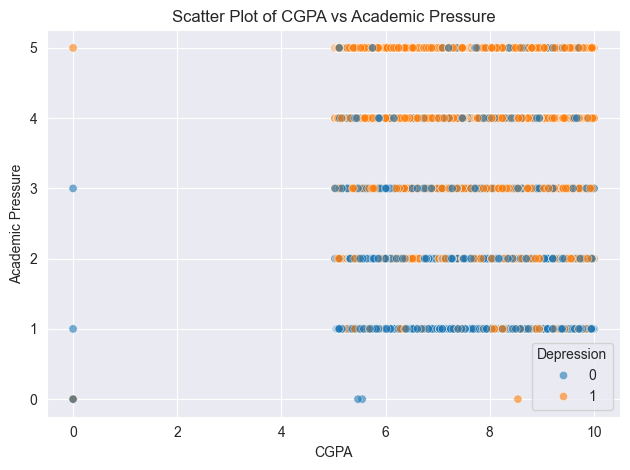

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make scatter plot
numerical_cols_scatter = ["CGPA", "Academic Pressure"]
sns.scatterplot(data=df, x=numerical_cols_scatter[0], y=numerical_cols_scatter[1], hue="Depression", alpha=0.6)
plt.title(f"Scatter Plot of {numerical_cols_scatter[0]} vs {numerical_cols_scatter[1]}")
plt.xlabel(numerical_cols_scatter[0])
plt.ylabel(numerical_cols_scatter[1])
plt.tight_layout()
plt.show()